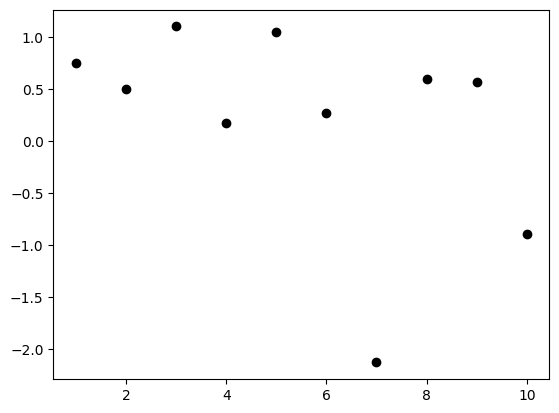

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# one-armed bandit 
# reward for pulling an arm is taken from a normal distribution
# with mean 0, and variance 1

mu, sigma = 0, 1 # mean, standard deviation (here, same as variance)
k = 10 # number of arms

reward_dist = np.random.normal(mu, sigma, k)

# Printing the actual reward taken when pulling each k levers
x_vals = range(1,k+1)
y_vals = reward_dist

plt.figure()
plt.plot(x_vals, y_vals, 'o', color='black')
plt.show()

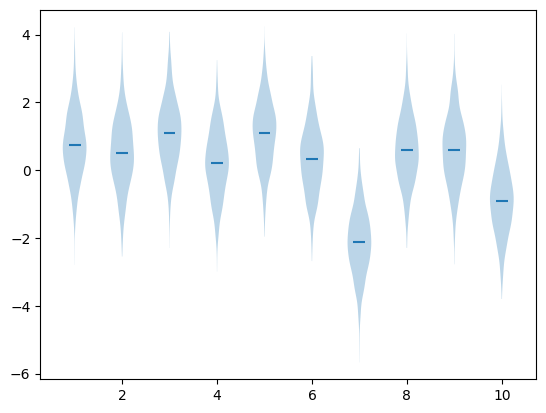

In [2]:
# Plotting k violin plots to demonstrate k normal distributions
time_steps = 1000
k_reward_dists = [np.random.normal(r, sigma, time_steps) for r in reward_dist]

plt.figure()
plt.violinplot(k_reward_dists, showmeans=True, showextrema=False)
plt.show()


Current epsilon:  0
Current epsilon:  0.1
Current epsilon:  0.01


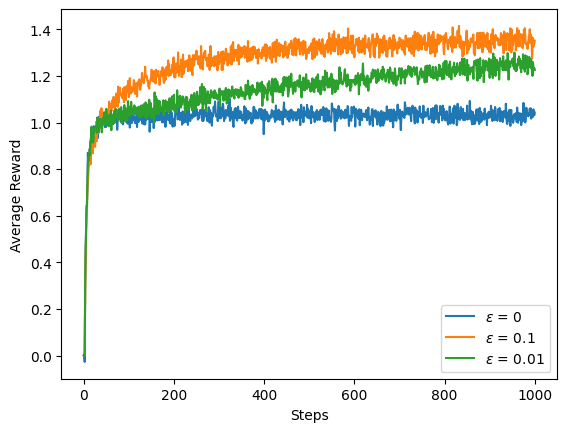

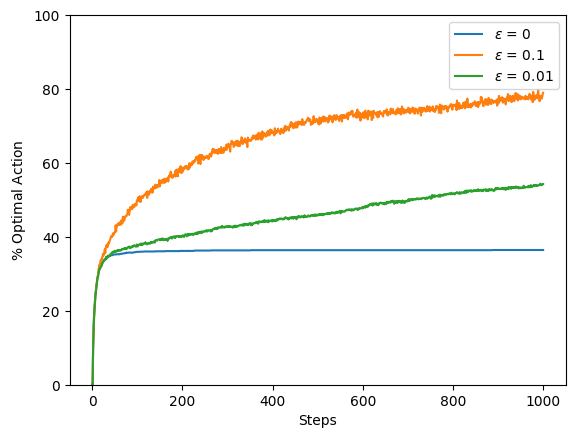

In [4]:
# Running experiments for 2000 bandits with 1000 time steps
mu, sigma = 0, 1 # mean, standard deviation
k = 10 # number of arms
time_steps = 1000 # number of time steps
n_bandits = 2000 # number of problems/bandits

# true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k)) # true rewards of each action, q*(a)
opt_action = np.argmax(Q_true, 1) # True optimal action

# For plotting
x_vals = range(time_steps+1) # x values for plotting
fig1 = plt.figure(1).gca()
fig2 = plt.figure(2).gca()

epsilon = [0, 0.1, 0.01] # epsilon values for epsilon-greedy algorithm
for ep in epsilon:
    print("Current epsilon: ", ep)    
    # step 0
    Q_values = np.zeros((n_bandits, k))
    rewards = []
    rewards.append(0) # Initial rewards are zero
    opt_actions_ratio = [] # Ratio of optimal action taken
    opt_actions_ratio.append(0) 

    # step 1
    Q_init = np.random.normal(Q_true, sigma) # In step 1, all actions are taken once
    N_values = np.ones((n_bandits, k)) # number of actions taken, each action is taken once
    rewards.append(np.mean(Q_init)) # rewards after step 1
    opt_actions_ratio.append(0) 

    # step 2-time_steps
    for step in range(2, time_steps+1):
        step_rewards = [] # rewards in this step
        opt_actions = 0 # how many times optimal action is taken
        for i in range(n_bandits):
            if np.random.random() < ep:
                act = np.random.randint(k) # random action
            else:
                act = np.argmax(Q_values[i]) # greedy action

            if act == opt_action[i]: # check if the action taken is the optimal action or not
                opt_actions += 1

            R = np.random.normal(Q_true[i][act], sigma) # reward taken from Q_values
            step_rewards.append(R) # add R to step rewards
            N_values[i][act] += 1 # number of actions taken increased
            Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])/N_values[i][act] # Update Q values            
        average_reward = np.mean(step_rewards) # get the average rewards for n_bandits
        rewards.append(average_reward) # add the average reward to total
        opt_actions_ratio.append(float(opt_actions)*100 /n_bandits) # append the values for this step

    # Plotting the reward graph for each epsilon
    fig1.plot(x_vals, rewards)
    fig2.plot(x_vals, opt_actions_ratio)
# Setting up the labels and legends
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend(('$\epsilon$ = '+str(epsilon[0]), '$\epsilon$ = '+str(epsilon[1]), '$\epsilon$ = '+str(epsilon[2])), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend(('$\epsilon$ = '+str(epsilon[0]), '$\epsilon$ = '+str(epsilon[1]), '$\epsilon$ = '+str(epsilon[2])), loc='best')
plt.show()

In [ ]:
# Implementation of exercise 2.5
import numpy as np 
import matplotlib.pyplot as plt 

# epsilon-greedy method for n-bandits
mu, sigma = 0, 0.01 # mean, standard deviation
k = 10 # number of arms
time_steps = 10000 # number of time steps
n_bandits = 2000 # number of problems/bandits
ep = 0.1 # epsilon for epsilon-greedy algorithm

# true values
Q_true = np.zeros((n_bandits, k)) # the true rewards  (AFTER FIRST STEP) are taken from normal distribution
opt_action = np.argmax(Q_true, 1) # the optimal action is the action that have maximum expected rewards (AFTER FIRST STEP)

# for plotting graphs
fig1 = plt.figure(1).gca() # Figure 2.5(a) from the book
fig2 = plt.figure(2).gca() # Figure 2.5(b) from the book
x_vals = range(time_steps+1)


# Running experiment for sample averages and step-size = 1/n
# step 0
Q_values = np.zeros((n_bandits, k))
rewards = []
rewards.append(0) # Initial rewards are zero
opt_actions_ratio = [] # Ratio of optimal action taken
opt_actions_ratio.append(0) 

# step 1
N_values = np.ones((n_bandits, k)) # number of actions taken, each action is taken once
rewards.append(0) # rewards after step 1
opt_actions_ratio.append(0) 

# step 2-time_steps
for step in range(2, time_steps+1):
    print("Running step ", step, "for sample-average")
    step_rewards = [] # rewards in this step
    opt_actions = 0 # how many times optimal action is taken
    for i in range(n_bandits):
        if np.random.random() < ep:
            act = np.random.randint(k) # random action
        else:
            act = np.argmax(Q_values[i]) # greedy action

        if act == opt_action[i]: # check if the action taken is the optimal action or not
            opt_actions += 1

        R = np.random.normal(Q_true[i][act], sigma) # reward taken from Q_values        
        step_rewards.append(R) # add R to step rewards
        N_values[i][act] += 1 # number of actions taken increased
        Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])/N_values[i][act] # Update Q values
    Q_true += np.random.normal(mu, sigma, (n_bandits, k))
    opt_action = np.argmax(Q_true, 1)
    average_reward = np.mean(step_rewards) # get the average rewards for n_bandits
    rewards.append(average_reward) # add the average reward to total
    opt_actions_ratio.append(float(opt_actions)*100 /n_bandits) # append the values for this step

# Plotting the reward graph for each epsilon
fig1.plot(x_vals, rewards)
fig2.plot(x_vals, opt_actions_ratio)

# Running experiment for constant step size alpha = 0.1
alpha = 0.1
Q_true = np.zeros((n_bandits, k))
# step 0
Q_values = np.zeros((n_bandits, k))
rewards = []
rewards.append(0) # Initial rewards are zero
opt_actions_ratio = [] # Ratio of optimal action taken
opt_actions_ratio.append(0) 

# step 1
N_values = np.ones((n_bandits, k)) # number of actions taken, each action is taken once
rewards.append(0) # rewards after step 1
opt_actions_ratio.append(0)

# step 2-time_steps
for step in range(2, time_steps+1):
    print("Running step ", step, "for constant step-size")
    step_rewards = [] # rewards in this step
    opt_actions = 0 # how many times optimal action is taken
    for i in range(n_bandits):
        if np.random.random() < ep:
            act = np.random.randint(k) # random action
        else:
            act = np.argmax(Q_values[i]) # greedy action

        if act == opt_action[i]: # check if the action taken is the optimal action or not
            opt_actions += 1
        R = np.random.normal(Q_true[i][act], sigma) # reward taken from Q_values
        step_rewards.append(R) # add R to step rewards
        N_values[i][act] += 1 # number of actions taken increased
        Q_values[i][act] = Q_values[i][act] + (R-Q_values[i][act])*alpha # Update Q values  
    Q_true += np.random.normal(mu, sigma, (n_bandits, k))
    opt_action = np.argmax(Q_true, 1)
    average_reward = np.mean(step_rewards) # get the average rewards for n_bandits
    rewards.append(average_reward) # add the average reward to total
    opt_actions_ratio.append(float(opt_actions)*100 /n_bandits) # append the values for this step

# Plotting the reward graph for each epsilon
fig1.plot(x_vals, rewards)
fig2.plot(x_vals, opt_actions_ratio)

# labels and legends for the plots
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')    
fig1.legend((r'sample average', r'constant step-size'), loc='best')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r'sample average', r'constant step-size'), loc='best')
plt.show()